## **Table of Contents:**
* Introduction
* Import Libraries
* Getting the Data
* Data Exploration/Analysis/Preprocessing
    - Explore categorical part of data
    - Relationship between target and independent categorial variables
    - Encoding Of Categorial Variables
    - Exploring numerical part of Data
    - Missing Data
    - Correlation
* Building Machine Learning Models
    - Training 5 different models
    - Which is the best model ?
    - K-Fold Cross Validation
    - Feature importance
    - Hyperparameter Tuning   
* Further Evaluation 
    - Confusion Matrix
    - Precision and Recall 
    - F-Score
    - Precision Recall Curve
    - ROC AUC Curve
    - ROC AUC Score
* Summary

# **Introduction**

In this kernel I will create a machine learning model using a dataset of credit history of bank customers. It gives information on a customer past credit behaviour, based on  Loan Status, Current Loan Amount, Term, Credit Score, Home Ownership,  Annual Income, , Monthly Debt, Years of Credit History, Maximum Open Credit, etc. In this challenge, we are asked to predict whether a customer will be given or refused a loan.

# **Import Libraries**
These are libraries need to perform various task

In [1]:
import pandas as pd 
import numpy as np
import os
import re
import warnings

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline

import sklearn 
import math

#relevant ML libraries
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.neighbors import LocalOutlierFactor



#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

warnings.filterwarnings('ignore')


# **Getting the Data**

In [2]:
LP = pd.read_csv('Loans data.csv')

# **Data Exploration/Analysis**

##  **First view of data**

In [3]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [4]:
LP.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,971.970120,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,641.640829,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,537.755000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [5]:
LP.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


## **Exploring Categorical part of the data**

In [6]:
LPcat = LP.describe(include = 'object')
LPcat

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Maximum Open Credit
count,111107,111107,111107,111107,106414,111107,111107,111107
unique,88910,88910,2,2,11,4,16,67309
top,341b63ee-0f6e-46c6-b7de-1ba68c44b178,cfd59fd2-454f-45c7-9a29-17f87fc0f768,Loan Given,Short Term,10+ years,Home Mortgage,Debt Consolidation,0
freq,2,2,85934,80274,34551,53818,87277,450


In [7]:
for col in LPcat.columns:
    LPcat = col
    print(col)

Loan ID
Customer ID
Loan Status
Term
Years in current job
Home Ownership
Purpose
Maximum Open Credit


In [8]:
LPcat =  LP[['Loan ID', 
             'Customer ID', 
             'Loan Status', 
             'Term', 
             'Years in current job', 
             'Home Ownership', 
             'Purpose', 
             'Maximum Open Credit']]

In [9]:
LPcat.drop('Loan ID', axis = 1, inplace = True)
LPcat.drop('Customer ID', axis = 1, inplace = True)

 - 'Loan ID' and 'Customer ID', were dropped since they are way identifying customer and product linked to them and are insignificant

### Value Count

In [10]:
def O_VC(LPcat,feature_name):
    """
    This will help know values available in an object('categories'), 
    type of features and return categorical values with count and proportion
    INPUT: Enter the name of the dataset and the specific feature
    OUTPUT: Returns value counts of items in categorical feature, corresponding
    proportions, and the barchart.
    """
    print(LPcat[feature_name].value_counts())
    print('\n')
    print(LPcat[feature_name].value_counts(normalize = True))
    print('\n')
    LPcat[feature_name].value_counts().plot.bar()

Loan Given      85934
Loan Refused    25173
Name: Loan Status, dtype: int64


Loan Given      0.773435
Loan Refused    0.226565
Name: Loan Status, dtype: float64




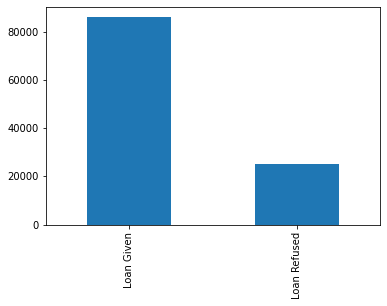

In [11]:
O_VC(LPcat, 'Loan Status')

Short Term    80274
Long Term     30833
Name: Term, dtype: int64


Short Term    0.722493
Long Term     0.277507
Name: Term, dtype: float64




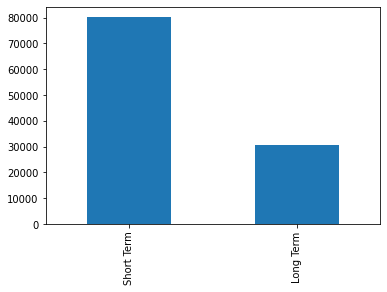

In [12]:
O_VC(LPcat, 'Term')

10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: Years in current job, dtype: int64


10+ years    0.324685
2 years      0.095457
3 years      0.085825
< 1 year     0.085092
5 years      0.071034
1 year       0.067425
4 years      0.064164
6 years      0.059297
7 years      0.058131
8 years      0.047973
9 years      0.040916
Name: Years in current job, dtype: float64




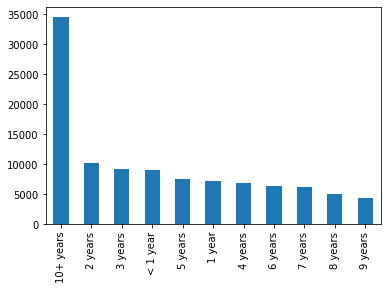

In [13]:
O_VC(LPcat, 'Years in current job')

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64


Home Mortgage    0.484380
Rent             0.421828
Own Home         0.091695
HaveMortgage     0.002097
Name: Home Ownership, dtype: float64




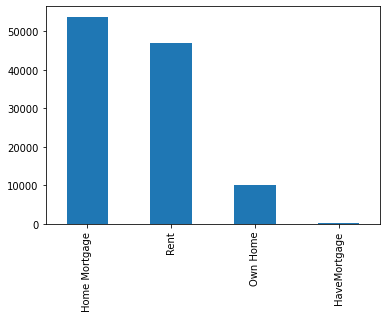

In [14]:
O_VC(LPcat, 'Home Ownership')

Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: Purpose, dtype: int64


Debt Consolidation      0.785522
other                   0.060041
Home Improvements       0.058538
Other                   0.032356
Business Loan           0.015742
Buy a Car               0.012798
Medical Bills           0.011331
Buy House               0.006822
Take a Trip             0.005598
major_purchase          0.003663
small_business          0.002862
moving                  0.001503
wedding                 0.001134
Educational Expenses    0.001026
vacation                0.00

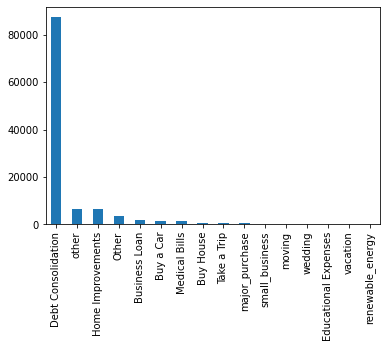

In [15]:
O_VC(LPcat, 'Purpose')

In [16]:
# O_VC(LPcat, 'Maximum Open Credit')

It is obvious that there is something wrong with 'Maximum Open Credit' column. let's find out more. The 'Maximum Open Credit' column appears to be numerical variable but produce an object data types. A search for the 
cause is done and the whole column is converted to numerical.

In [17]:
LPcat['Maximum Open Credit'].unique()

array(['7946', '77961', '14815', ..., 11431, 33389, 10634], dtype=object)

In [18]:
#LPcat['Maximum Open Credit'] = pd.to_numeric(LPcat['Maximum Open Credit'])
#LPcat['Maximum Open Credit']

In [19]:
LPcat['Maximum Open Credit'][4930]

'#VALUE!'

In [20]:
LPcat['Maximum Open Credit'].replace('#VALUE!', np.nan, inplace = True)
LPcat['Maximum Open Credit'][4930]

nan

In [21]:
LPcat['Maximum Open Credit'] = pd.to_numeric(LPcat['Maximum Open Credit'])
LP['Maximum Open Credit'] = LPcat['Maximum Open Credit']
LP['Maximum Open Credit']

0          7946.0
1         77961.0
2         14815.0
3         43533.0
4         19553.0
           ...   
111102    29757.0
111103    23060.0
111104     6348.0
111105    37580.0
111106     9261.0
Name: Maximum Open Credit, Length: 111107, dtype: float64

In [22]:
LPcat.drop('Maximum Open Credit', axis = 1, inplace = True)

In [23]:
LPcat['Years in current job']=LPcat['Years in current job'].str.replace(
    '<','',).str.replace('+','').str.replace('year','').str.replace('s','').astype('float')
LPcat['Years in current job'].value_counts()

10.0    34551
1.0     16230
2.0     10158
3.0      9133
5.0      7559
4.0      6828
6.0      6310
7.0      6186
8.0      5105
9.0      4354
Name: Years in current job, dtype: int64

In [24]:
LP['Years in current job']=LPcat['Years in current job']
LPcat.drop('Years in current job', axis = 1, inplace = True)
LP['Years in current job']

0          1.0
1         10.0
2          9.0
3          3.0
4         10.0
          ... 
111102    10.0
111103    10.0
111104     5.0
111105    10.0
111106     1.0
Name: Years in current job, Length: 111107, dtype: float64

## **Relationship between target variables and independent categorial variables**
This relationship is investigated by the use of stacked bar plot with proportions of given and refused loans

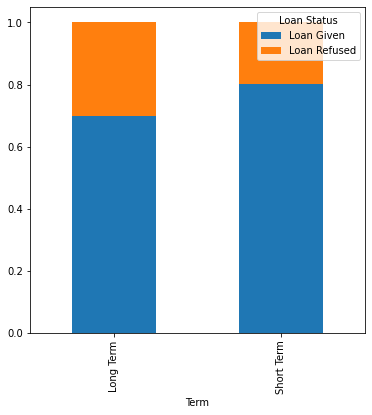

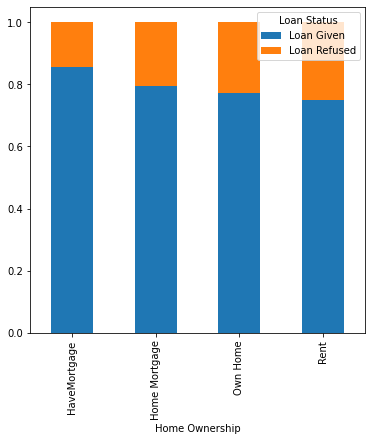

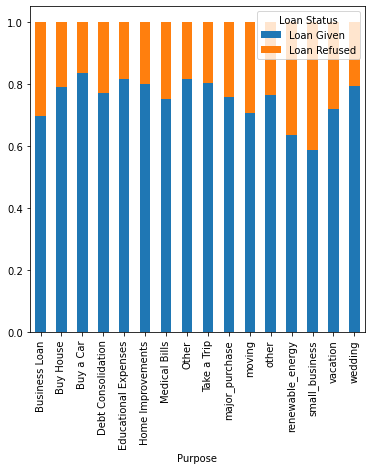

In [25]:
Term = pd.crosstab(LPcat['Term'],LPcat['Loan Status'])
Term.div(Term.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (6,6))
plt.show()

HomeOwnership = pd.crosstab(LPcat['Home Ownership'],LPcat['Loan Status'])
HomeOwnership.div(HomeOwnership.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (6,6))
plt.show()

Purpose = pd.crosstab(LPcat['Purpose'],LPcat['Loan Status'])
Purpose.div(Purpose.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (6,6))
plt.show()



### **Encoding Of Categorial Variables**

In [26]:
LPcat['Term'].value_counts()

Short Term    80274
Long Term     30833
Name: Term, dtype: int64

In [27]:
term_dummies = pd.get_dummies(LPcat['Term'])
LPcat = pd.concat([LPcat,term_dummies],axis = 1)
LPcat.drop('Term', axis = 1, inplace = True)

In [28]:
LPcat['Home Ownership'].value_counts()

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64

In [29]:
LPcat['Home Ownership'].replace(['HaveMortgage', 'Own Home', 'Rent', 'Home Mortgage'], [0, 1, 2, 3], inplace = True) 

In [30]:
LPcat['Purpose'].value_counts()

Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: Purpose, dtype: int64

In [31]:
LPcat['Purpose'].replace(['Debt Consolidation',
                          'other', 
                          'Home Improvements', 
                          'Other', 
                          'Business Loan', 
                          'Buy a Car', 
                          'Medical Bills', 
                          'Buy House',     
                          'Take a Trip', 
                          'major_purchase', 
                          'small_business', 
                          'moving', 
                          'wedding', 
                          'Educational Expenses', 
                          'vacation', 
                          'renewable_energy'], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], inplace = True) 

In [32]:
LPcat['Loan Status'].replace(['Loan Refused','Loan Given'],[0,1], inplace =True)
LPcat['Loan Status'].sample(10)

91182     1
33680     1
33437     1
0         0
63139     0
73579     1
32529     1
5385      1
86236     1
106265    1
Name: Loan Status, dtype: int64

In [33]:
LPcat['Loan Status'].shape

(111107,)

In [34]:
LPcat.head()

,Loan Status,Home Ownership,Purpose,Long Term,Short Term
0,0,2,1,0,1
1,0,3,1,1,0
2,0,3,0,0,1
3,0,2,1,0,1
4,0,3,0,1,0


### **Exploring numerical part of Data**

In [35]:
LPnum = LP.describe(include = np.number)
for col in LPnum.columns:
    print(col)

Current Loan Amount
Credit Score
Years in current job
Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Number of Credit Problems
Current Credit Balance
Maximum Open Credit
Bankruptcies
Tax Liens


In [36]:
LPnum = LP[[ 'Current Loan Amount',
             'Credit Score',
             'Years in current job',
             'Annual Income', 
             'Monthly Debt', 
             'Years of Credit History',
             'Months since last delinquent',
             'Number of Open Accounts',
             'Number of Credit Problems',
             'Current Credit Balance',
             'Bankruptcies',
             'Maximum Open Credit',
            'Tax Liens' ]]

In [37]:
LPnum.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Maximum Open Credit,Tax Liens
count,1.111070e+05,89769.000000,106414.000000,8.976900e+04,111107.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,1.111050e+05,111096.000000
mean,1.147718e+07,1075.795029,5.974308,7.248600e+04,971.970120,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,3.438644e+04,0.029353
std,3.185508e+07,1474.133505,3.500436,5.593094e+04,641.640829,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,3.643027e+05,0.260575
min,4.910000e+02,585.000000,1.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000
25%,8.162000e+03,705.000000,3.000000,4.468800e+04,537.755000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,1.241700e+04,0.000000
50%,1.418300e+04,724.000000,6.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,2.124300e+04,0.000000
75%,2.382200e+04,741.000000,10.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,3.558400e+04,0.000000
max,1.000000e+08,7510.000000,10.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,6.998809e+07,15.000000


In [38]:
cor = LPnum.corr().abs()
cor

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Maximum Open Credit,Tax Liens
Current Loan Amount,1.000000,0.096565,0.001897,0.010673,0.010440,0.018193,0.009815,0.000084,0.001904,0.001862,0.000676,0.001424,0.000127
Credit Score,0.096565,1.000000,0.005879,0.019999,0.003228,0.010127,0.002741,0.005579,0.001948,0.001758,0.005786,0.003071,0.005155
Years in current job,0.001897,0.005879,1.000000,0.079529,0.129979,0.227092,0.003213,0.052004,0.039682,0.098356,0.040744,0.002146,0.013010
Annual Income,0.010673,0.019999,0.079529,1.000000,0.491350,0.163397,0.075919,0.148766,0.015702,0.311503,0.048532,0.053650,0.042600
Monthly Debt,0.010440,0.003228,0.129979,0.491350,1.000000,0.199040,0.054496,0.411867,0.053780,0.480299,0.079225,0.040756,0.022274
Years of Credit History,0.018193,0.010127,0.227092,0.163397,0.199040,1.000000,0.042866,0.132027,0.062915,0.207137,0.066311,0.032039,0.019959
Months since last delinquent,0.009815,0.002741,0.003213,0.075919,0.054496,0.042866,1.000000,0.032356,0.105628,0.027322,0.126004,0.009639,0.011661
Number of Open Accounts,0.000084,0.005579,0.052004,0.148766,0.411867,0.132027,0.032356,1.000000,0.013996,0.227014,0.024052,0.032530,0.006841
Number of Credit Problems,0.001904,0.001948,0.039682,0.015702,0.053780,0.062915,0.105628,0.013996,1.000000,0.111938,0.752255,0.012652,0.585772
Current Credit Balance,0.001862,0.001758,0.098356,0.311503,0.480299,0.207137,0.027322,0.227014,0.111938,1.000000,0.122544,0.142420,0.015476


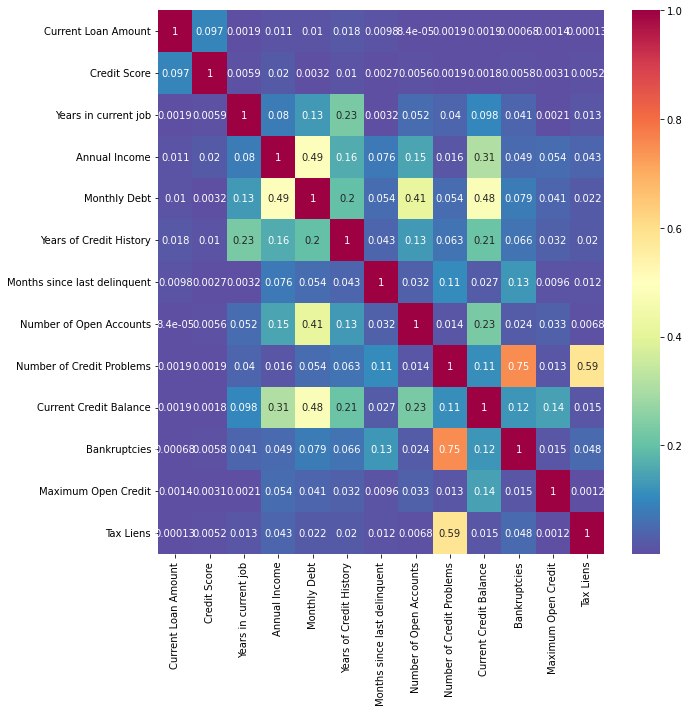

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot = cor,cmap = 'Spectral_r')
plt.show()

From the heatmap above, it can be seen that some features are correlated. This means they serve a similar purpose in the dataset. Therefore **Bankruptcies** and **Tax Liens** will be dropped.

In [40]:
def LP_column_drop(LPnum, feature_name):      
    LPnum.drop(feature_name, axis = 1, inplace = True)

In [41]:
LP_column_drop(LPnum, 'Bankruptcies')
LP_column_drop(LPnum, 'Tax Liens')            

### **Dealing with outliers**
#### Mean and Standard deviation based approach: keep values that fall within the range of (mean -3 * std) and (mean +3 * std)

In [42]:
def dist(LPnum,feature_name):
    sns.distplot(LPnum[feature_name])
    plt.show()
def checker(LPnum,feature_name):
    sns.boxplot(LPnum[feature_name],orient = 'v')
    plt.show()
def remover(LPnum,feature_name):
    mean_ = LPnum[feature_name].mean()
    std_ = LPnum[feature_name].std()
    cut_off =std_*3
    lower,upper = mean_-std_ , mean_+std_
    checker = (LPnum[feature_name]<upper) & (LPnum[feature_name]>lower)
    std_method = LPnum[feature_name][checker]
    LPnum[feature_name]=std_method
def outlier_remover(LPnum,feature_name):
    dist(LPnum,feature_name)
    checker(LPnum,feature_name)
    remover(LPnum,feature_name)

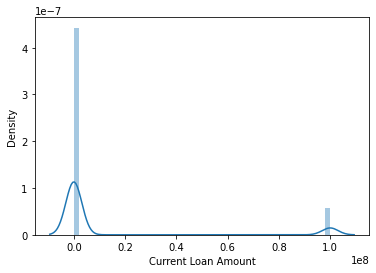

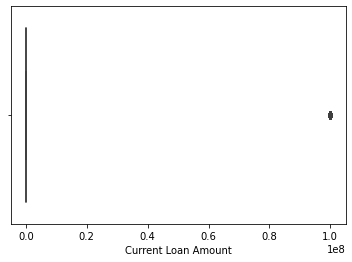

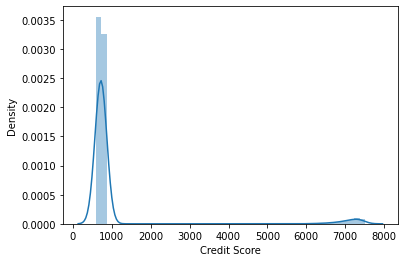

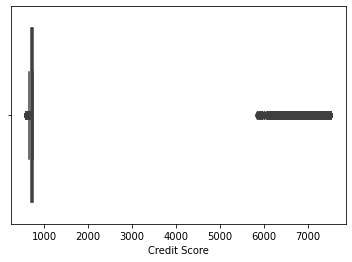

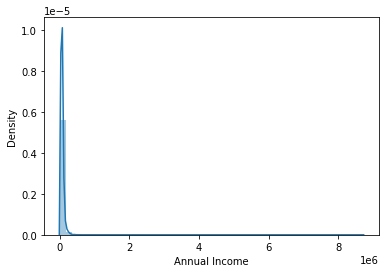

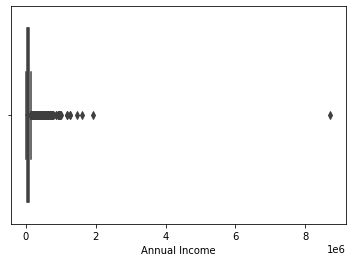

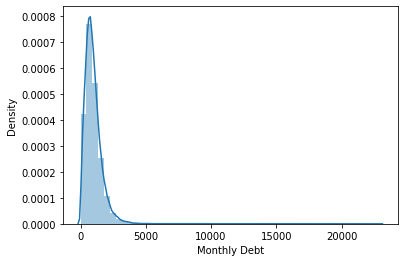

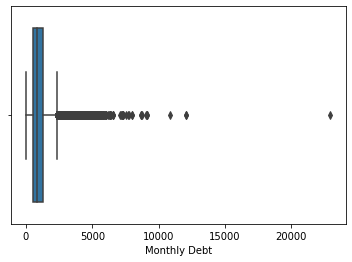

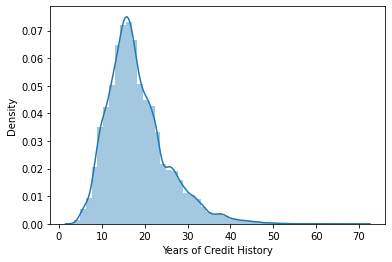

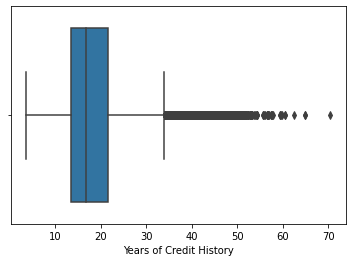

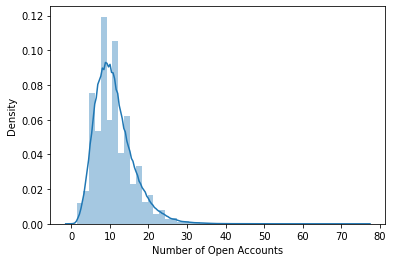

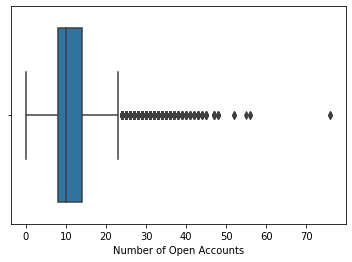

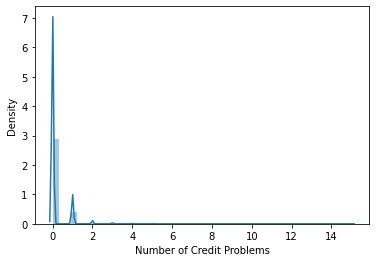

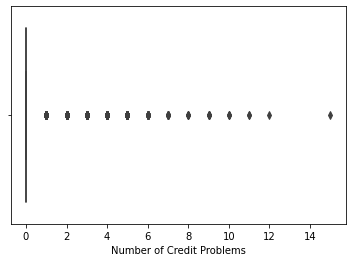

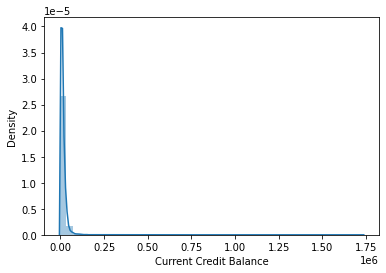

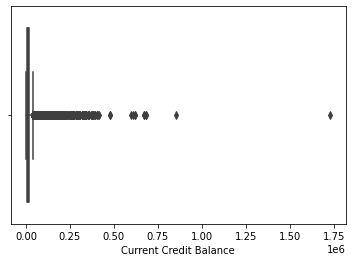

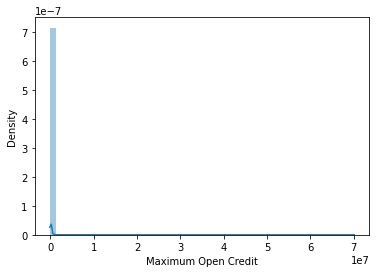

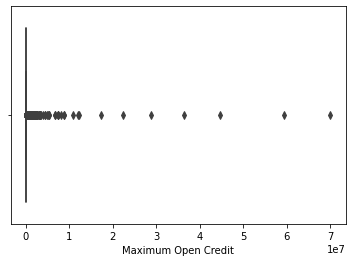

In [43]:
outlier_remover(LPnum, 'Current Loan Amount')
outlier_remover(LPnum, 'Credit Score')
outlier_remover(LPnum, 'Annual Income')
outlier_remover(LPnum, 'Monthly Debt')
outlier_remover(LPnum, 'Years of Credit History')
outlier_remover(LPnum, 'Number of Open Accounts')
outlier_remover(LPnum, 'Number of Credit Problems')
outlier_remover(LPnum, 'Current Credit Balance')
outlier_remover(LPnum, 'Maximum Open Credit')

## **Checking for missing values in the data**

For Categorical Part of the Data

In [44]:
LPcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Loan Status     111107 non-null  int64
 1   Home Ownership  111107 non-null  int64
 2   Purpose         111107 non-null  int64
 3   Long Term       111107 non-null  uint8
 4   Short Term      111107 non-null  uint8
dtypes: int64(3), uint8(2)
memory usage: 2.8 MB


### For Numerical Part of Data
#### Columns with more the 30% of values missing will be dropped and columns with missing values filled by method of interpolation.

In [45]:
LPnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           98369 non-null   float64
 1   Credit Score                  84725 non-null   float64
 2   Years in current job          106414 non-null  float64
 3   Annual Income                 82096 non-null   float64
 4   Monthly Debt                  83903 non-null   float64
 5   Years of Credit History       79712 non-null   float64
 6   Months since last delinquent  52104 non-null   float64
 7   Number of Open Accounts       78387 non-null   float64
 8   Number of Credit Problems     95642 non-null   float64
 9   Current Credit Balance        103171 non-null  float64
 10  Maximum Open Credit           110772 non-null  float64
dtypes: float64(11)
memory usage: 9.3 MB


In [46]:
LPnum.isnull().sum()

Current Loan Amount             12738
Credit Score                    26382
Years in current job             4693
Annual Income                   29011
Monthly Debt                    27204
Years of Credit History         31395
Months since last delinquent    59003
Number of Open Accounts         32720
Number of Credit Problems       15465
Current Credit Balance           7936
Maximum Open Credit               335
dtype: int64

In [47]:
LPnum.isnull().sum()/len(LPnum)

Current Loan Amount             0.114646
Credit Score                    0.237447
Years in current job            0.042239
Annual Income                   0.261109
Monthly Debt                    0.244845
Years of Credit History         0.282565
Months since last delinquent    0.531047
Number of Open Accounts         0.294491
Number of Credit Problems       0.139190
Current Credit Balance          0.071427
Maximum Open Credit             0.003015
dtype: float64

In [48]:
LPnum_mask = LPnum.isnull().sum()/len(LPnum)<.3
LPnum_mask

Current Loan Amount              True
Credit Score                     True
Years in current job             True
Annual Income                    True
Monthly Debt                     True
Years of Credit History          True
Months since last delinquent    False
Number of Open Accounts          True
Number of Credit Problems        True
Current Credit Balance           True
Maximum Open Credit              True
dtype: bool

In [49]:
LPnum = LPnum.loc[:,LPnum_mask]

In [50]:
LPnum.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,12232.0,NaN,1.0,46643.0,777.39,18.0,12.0,0.0,6762.0,7946.0
1,25014.0,NaN,10.0,81099.0,892.09,NaN,14.0,0.0,NaN,77961.0
2,16117.0,NaN,9.0,60438.0,1244.02,16.7,11.0,NaN,11275.0,14815.0
3,11716.0,NaN,3.0,34171.0,990.94,NaN,NaN,0.0,7009.0,43533.0
4,9789.0,NaN,10.0,47003.0,503.71,16.7,13.0,NaN,16913.0,19553.0


In [51]:
LPnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Current Loan Amount        98369 non-null   float64
 1   Credit Score               84725 non-null   float64
 2   Years in current job       106414 non-null  float64
 3   Annual Income              82096 non-null   float64
 4   Monthly Debt               83903 non-null   float64
 5   Years of Credit History    79712 non-null   float64
 6   Number of Open Accounts    78387 non-null   float64
 7   Number of Credit Problems  95642 non-null   float64
 8   Current Credit Balance     103171 non-null  float64
 9   Maximum Open Credit        110772 non-null  float64
dtypes: float64(10)
memory usage: 8.5 MB


In [52]:
LPnum['Current Loan Amount'].fillna(LPnum['Current Loan Amount'].mean(), inplace = True)
LPnum['Years in current job'].fillna(LPnum['Years in current job'].mean(), inplace = True)
LPnum['Annual Income'].fillna(LPnum['Annual Income'].mean(), inplace = True)
LPnum['Credit Score'].fillna(LPnum['Credit Score'].mean(), inplace = True)
LPnum['Monthly Debt'].fillna(LPnum['Monthly Debt'].mean(), inplace = True)
LPnum['Years of Credit History'].fillna(LPnum['Years of Credit History'].mean(), inplace = True)
LPnum['Number of Open Accounts'].fillna(LPnum['Number of Open Accounts'].mean(), inplace = True)
LPnum['Number of Credit Problems'].fillna(LPnum['Number of Credit Problems'].mean(), inplace = True)
LPnum['Current Credit Balance'].fillna(LPnum['Current Credit Balance'].mean(), inplace = True)
LPnum['Maximum Open Credit'].fillna(LPnum['Maximum Open Credit'].mean(), inplace = True)
LPnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Current Loan Amount        111107 non-null  float64
 1   Credit Score               111107 non-null  float64
 2   Years in current job       111107 non-null  float64
 3   Annual Income              111107 non-null  float64
 4   Monthly Debt               111107 non-null  float64
 5   Years of Credit History    111107 non-null  float64
 6   Number of Open Accounts    111107 non-null  float64
 7   Number of Credit Problems  111107 non-null  float64
 8   Current Credit Balance     111107 non-null  float64
 9   Maximum Open Credit        111107 non-null  float64
dtypes: float64(10)
memory usage: 8.5 MB


In [53]:
LPnum.head(5)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,12232.0,716.612735,1.0,46643.0,777.39,18.000000,12.000000,0.0,6762.000000,7946.0
1,25014.0,716.612735,10.0,81099.0,892.09,17.235916,14.000000,0.0,12032.383034,77961.0
2,16117.0,716.612735,9.0,60438.0,1244.02,16.700000,11.000000,0.0,11275.000000,14815.0
3,11716.0,716.612735,3.0,34171.0,990.94,17.235916,10.763417,0.0,7009.000000,43533.0
4,9789.0,716.612735,10.0,47003.0,503.71,16.700000,13.000000,0.0,16913.000000,19553.0


#### **Putting categorial data and numerical data together**

In [54]:
LPF = pd.concat([LPcat, LPnum], axis = 1, join = 'inner')
LPF

,Loan Status,Home Ownership,Purpose,Long Term,Short Term,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,0,2,1,0,1,12232.0,716.612735,1.0,46643.0,777.39,18.000000,12.000000,0.0,6762.000000,7946.0
1,0,3,1,1,0,25014.0,716.612735,10.0,81099.0,892.09,17.235916,14.000000,0.0,12032.383034,77961.0
2,0,3,0,0,1,16117.0,716.612735,9.0,60438.0,1244.02,16.700000,11.000000,0.0,11275.000000,14815.0
3,0,2,1,0,1,11716.0,716.612735,3.0,34171.0,990.94,17.235916,10.763417,0.0,7009.000000,43533.0
4,0,3,0,1,0,9789.0,716.612735,10.0,47003.0,503.71,16.700000,13.000000,0.0,16913.000000,19553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,1,2,1,1,0,15654.0,686.000000,10.0,43050.0,889.69,14.100000,10.763417,0.0,14730.000000,29757.0
111103,1,3,1,0,1,15237.0,706.000000,10.0,60948.0,700.90,15.900000,11.000000,0.0,17733.000000,23060.0
111104,1,3,1,0,1,10413.0,719.000000,5.0,66945.0,1210.59,17.235916,11.000000,0.0,5205.000000,6348.0
111105,1,3,1,0,1,34447.0,626.000000,10.0,78736.0,1476.30,17.235916,12.000000,0.0,32318.000000,37580.0


Th correlation between all variable in the data set is visualized using heatmap again.

In [55]:
cor1 = LPF.corr().abs()
cor1

,Loan Status,Home Ownership,Purpose,Long Term,Short Term,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
Loan Status,1.000000,0.037600,0.007546,0.109398,0.109398,0.038210,0.077519,0.007189,0.066031,0.004696,0.018804,0.002984,NaN,0.011232,0.041175
Home Ownership,0.037600,1.000000,0.018940,0.095877,0.095877,0.157938,0.033479,0.140489,0.192857,0.105091,0.073090,0.056698,NaN,0.129137,0.127626
Purpose,0.007546,0.018940,1.000000,0.046669,0.046669,0.157615,0.070384,0.043389,0.010523,0.060505,0.009951,0.049141,NaN,0.192851,0.044650
Long Term,0.109398,0.095877,0.046669,1.000000,1.000000,0.405625,0.406339,0.069048,0.130188,0.121845,0.026025,0.046608,NaN,0.152357,0.091775
Short Term,0.109398,0.095877,0.046669,1.000000,1.000000,0.405625,0.406339,0.069048,0.130188,0.121845,0.026025,0.046608,NaN,0.152357,0.091775
Current Loan Amount,0.038210,0.157938,0.157615,0.405625,0.405625,1.000000,0.175304,0.109260,0.351861,0.238406,0.085700,0.105002,NaN,0.374973,0.316600
Credit Score,0.077519,0.033479,0.070384,0.406339,0.406339,0.175304,1.000000,0.015889,0.002792,0.055813,0.035595,0.012442,NaN,0.019898,0.087429
Years in current job,0.007189,0.140489,0.043389,0.069048,0.069048,0.109260,0.015889,1.000000,0.128597,0.098825,0.126443,0.028200,NaN,0.123311,0.095136
Annual Income,0.066031,0.192857,0.010523,0.130188,0.130188,0.351861,0.002792,0.128597,1.000000,0.302824,0.104509,0.095278,NaN,0.245836,0.223275
Monthly Debt,0.004696,0.105091,0.060505,0.121845,0.121845,0.238406,0.055813,0.098825,0.302824,1.000000,0.062858,0.148538,NaN,0.264014,0.166512


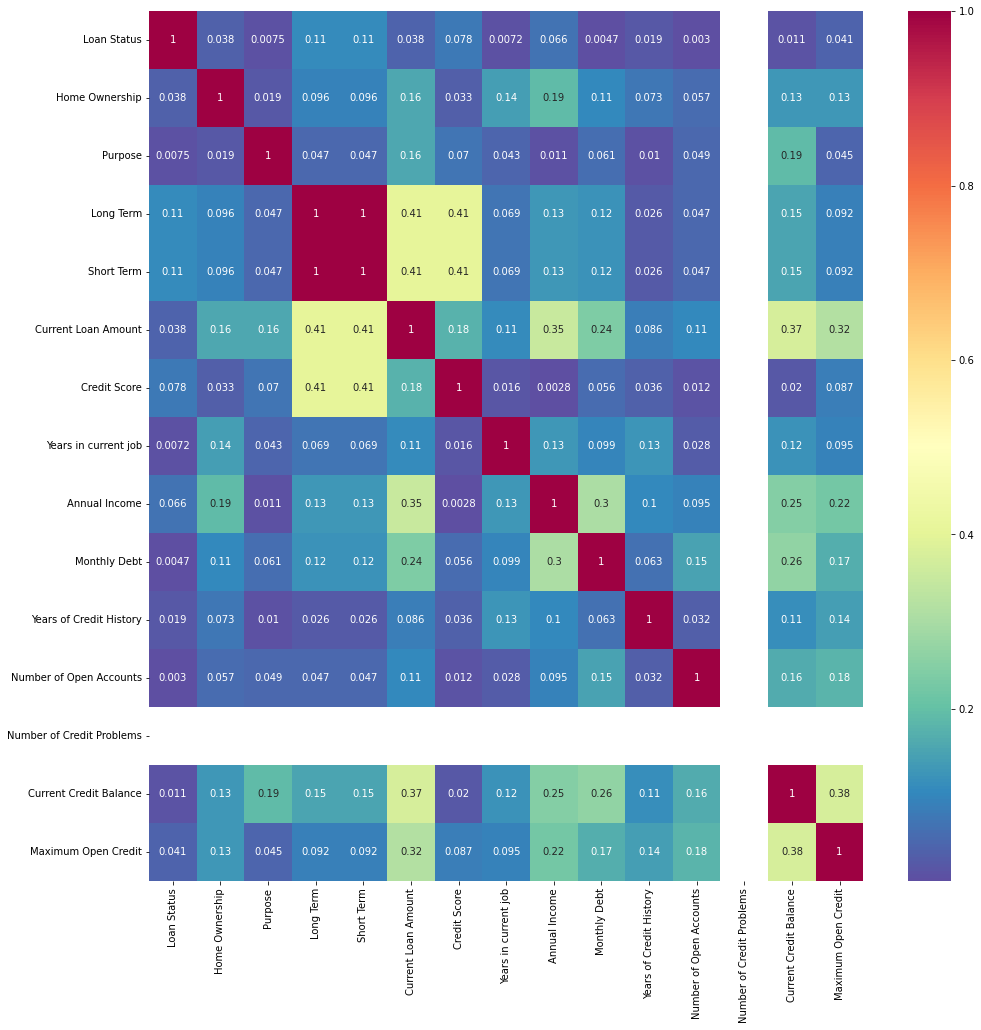

In [56]:
plt.figure(figsize=(16,16))
sns.heatmap(cor1,annot = cor1,cmap = 'Spectral_r')
plt.show()

In [57]:
LPF.head(10)

,Loan Status,Home Ownership,Purpose,Long Term,Short Term,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,0,2,1,0,1,12232.0,716.612735,1.0,46643.0,777.390000,18.000000,12.000000,0.0,6762.000000,7946.0
1,0,3,1,1,0,25014.0,716.612735,10.0,81099.0,892.090000,17.235916,14.000000,0.0,12032.383034,77961.0
2,0,3,0,0,1,16117.0,716.612735,9.0,60438.0,1244.020000,16.700000,11.000000,0.0,11275.000000,14815.0
3,0,2,1,0,1,11716.0,716.612735,3.0,34171.0,990.940000,17.235916,10.763417,0.0,7009.000000,43533.0
4,0,3,0,1,0,9789.0,716.612735,10.0,47003.0,503.710000,16.700000,13.000000,0.0,16913.000000,19553.0
5,0,3,0,0,1,11911.0,716.612735,2.0,70475.0,886.810000,17.700000,13.000000,0.0,28212.000000,59897.0
6,0,3,1,0,1,28988.0,716.612735,3.0,58074.0,871.110000,22.800000,9.000000,0.0,14423.000000,54018.0
7,0,1,1,1,0,17705.0,716.612735,3.0,49180.0,878.690218,17.235916,10.000000,0.0,4252.000000,25012.0
8,0,2,1,0,1,16812.0,716.612735,7.0,50945.0,590.120000,14.600000,9.000000,0.0,12903.000000,15379.0
9,0,2,1,1,0,9796.0,716.612735,1.0,58776.0,666.130000,17.235916,12.000000,0.0,4939.000000,15198.0


In [58]:
LPF['Number of Credit Problems'].unique()

array([0.])

In [59]:
LP_column_drop(LPF, 'Number of Credit Problems')

## **Preprocessing For Machine Learning**

First of all we will divide our dataset into two variables.
- The predictor variable `X` is the features which include all attributes of the dataset without `Loan_Status`. 
- The target variable `y` is the `Loan_Status` the target value we want to predict.
- The independent variable is then normalized
* Preprocessing
  - Scaling independent variable
  - Balancing target variable
  - Splitting into training, validation and test set
* Modelling
  - Training and testing models on the dataset
  - Selecting the best model
  - Plotting feature importance for the best model
  - Dropping insignificant features 
  - Evaluating the best model with diferent matrices

In [60]:
y= LPF['Loan Status']                         # Target Variable
X = LPF.drop('Loan Status', axis =1)          # Independent Variable

In [61]:
scaler = StandardScaler()
LPFs = scaler.fit_transform(X)
LPFn = pd.DataFrame(LPFs, columns = X.columns)
LPFn.head(5)

,Home Ownership,Purpose,Long Term,Short Term,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit
0,-0.590019,0.522531,-0.619756,0.619756,-0.244975,0.0,-1.452058,-0.764743,-0.350846,2.543023e-01,0.560047,-0.661881,-0.719816
1,0.928730,0.522531,1.613539,-1.613539,1.360755,0.0,1.175146,0.823269,0.046409,-5.557340e-14,1.465844,0.000000,1.731465
2,0.928730,-1.913762,-0.619756,0.619756,0.243075,0.0,0.883234,-0.128957,1.265294,-1.783632e-01,0.107148,-0.095116,-0.479326
3,-0.590019,0.522531,-0.619756,0.619756,-0.309797,0.0,-0.868235,-1.339554,0.388769,-5.557340e-14,0.000000,-0.630861,0.526114
4,0.928730,-1.913762,1.613539,-1.613539,-0.551876,0.0,1.175146,-0.748151,-1.298718,-1.783632e-01,1.012945,0.612932,-0.313445


In [62]:
Loan_Given = LPF[LPF['Loan Status']==1]
Loan_Refused = LPF[LPF['Loan Status']==0]

In [63]:
X_resampled,y_resampled = ADASYN().fit_resample(X,y)
X_resampled.shape,y_resampled.shape

((173384, 13), (173384,))

In [64]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({1: 85934, 0: 25173})
Resampled dataset shape Counter({0: 87450, 1: 85934})


In [65]:
X = X_resampled
y = y_resampled

In [66]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 97528
 size of validation set: 32510
 size of test set: 43346



In [67]:
def plot_metric(confusion, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='viridis')
    ax.set_title(f'{name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

## **Modelling**

### **Histogram-based Gradient Boosting Classification Tree [HistGradientBoosting]**

train set score: 87.51
test set score: 87.39

Accuracy Score: 87.39%

Precision Score: 79.94%

Recall Score: 99.24%

F1 Score: 0.89%

AUC score is: 92.82 %




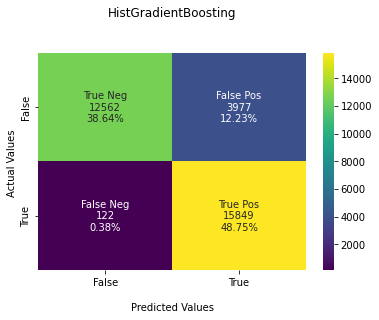

In [68]:
from sklearn.ensemble import HistGradientBoostingClassifier
LPdt = HistGradientBoostingClassifier() 

#Fit 'LPdt' to the training set
LPdt.fit(X_train, y_train)

# Predict Output
dy_predict = LPdt.predict(X_valid)
pred_LPdt = LPdt.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPdt_Tr_Score = round(LPdt.score(X_train, y_train)*100, 2)
LPdt_Tt_Score = round(LPdt.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPdt_Tr_Score))
print('test set score: {:.2f}'.format(LPdt_Tt_Score))


print()
LPdt_sc = round(accuracy_score(y_valid, dy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPdt_sc))
print()
PS_dt = round(precision_score(y_valid, dy_predict)*100, 2)
print("Precision Score: {}%".format(PS_dt))
print()
RS_dt = round(recall_score(y_valid, dy_predict)*100, 2)
print("Recall Score: {}%".format(RS_dt))
print()
FS_dt = round(f1_score(y_valid, dy_predict), 2)
print("F1 Score: {}%".format(FS_dt))
print()
fpr1, tpr1, threshold = roc_curve(y_valid, pred_LPdt)
roc_auc = metrics.auc(fpr1, tpr1)
LPhgbA = round(metrics.auc(fpr1, tpr1)*100, 2)
print(f'AUC score is:', LPhgbA,'%')
print()
confusion = confusion_matrix(y_valid, dy_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "HistGradientBoosting")

### **AdaBoost**

train set score: 79.74
test set score: 80.00

Accuracy Score: 80.0%

Precision Score: 78.34%

Recall Score: 81.95%

F1 Score: 0.8%

AUC score is: 88.6 %




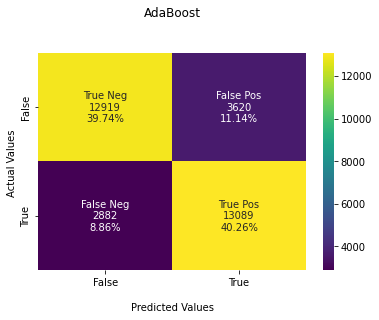

In [69]:
from sklearn.ensemble import AdaBoostClassifier
LPrf = AdaBoostClassifier(n_estimators=100, random_state=0)

#Fit 'LPrf' to the training set
LPrf.fit(X_train, y_train)

# Predict Output
ry_predict = LPrf.predict(X_valid)
pred_LPrf = LPrf.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPrf_Tr_Score = round(LPrf.score(X_train, y_train)*100, 2)
LPrf_Tt_Score = round(LPrf.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPrf_Tt_Score))


print()
LPrf_sc = round(accuracy_score(y_valid, ry_predict)*100, 2)
print("Accuracy Score: {}%".format(LPrf_sc))
print()
PS_rf = round(precision_score(y_valid, ry_predict)*100, 2)
print("Precision Score: {}%".format(PS_rf))
print()
RS_rf = round(recall_score(y_valid, ry_predict)*100, 2)
print("Recall Score: {}%".format(RS_rf))
print()
FS_rf = round(f1_score(y_valid, ry_predict), 2)
print("F1 Score: {}%".format(FS_rf))
print()
fpr2, tpr2, threshold = roc_curve(y_valid, pred_LPrf)
roc_auc = metrics.auc(fpr2, tpr2)
LPabtA = round(metrics.auc(fpr2, tpr2)*100, 2)
print(f'AUC score is:', LPabtA,'%')
print()
confusion = confusion_matrix(y_valid, ry_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "AdaBoost")



### **Logistic Regression**

train set score: 79.74
test set score: 54.31

Accuracy Score: 54.31%

Precision Score: 53.94%

Recall Score: 47.91%

F1 Score: 0.51%

AUC score is: 56.1 %



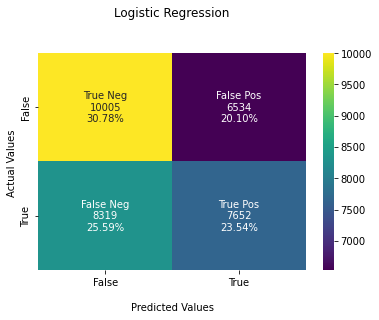

In [70]:
LPlr = LogisticRegression()

# Fit 'LPknn' to the training set
LPlr.fit(X_train, y_train)

# Predict Output
ly_predict = LPlr.predict(X_valid)
pred_LPlr = LPlr.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPlr_Tr_Score = round(LPlr.score(X_train, y_train)*100, 2)
LPlr_Tt_Score = round(LPlr.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPlr_Tt_Score))


print()
LPlr_sc = round(accuracy_score(y_valid, ly_predict)*100, 2)
print("Accuracy Score: {}%".format(LPlr_sc))
print()
PS_lr = round(precision_score(y_valid, ly_predict)*100, 2)
print("Precision Score: {}%".format(PS_lr))
print()
RS_lr = round(recall_score(y_valid, ly_predict)*100, 2)
print("Recall Score: {}%".format(RS_lr))
print()
FS_lr = round(f1_score(y_valid, ly_predict), 2)
print("F1 Score: {}%".format(FS_lr))
print()
fpr3, tpr3, threshold = roc_curve(y_valid, pred_LPlr)
roc_auc = metrics.auc(fpr3, tpr3)
LPlrA = round(metrics.auc(fpr3, tpr3)*100, 2)
print(f'AUC score is:', LPlrA,'%')
print()
confusion = confusion_matrix(y_valid, ly_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Logistic Regression")

### **K- Nearest Neighbors (KNN)**

train set score: 79.74
test set score: 67.78

Accuracy Score: 67.78%

Precision Score: 72.27%

Recall Score: 55.83%

F1 Score: 0.63%

AUC score is: 73.15 %



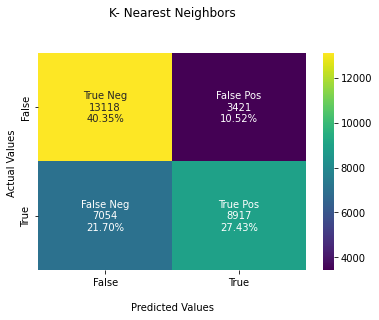

In [71]:
LPknn = KNeighborsClassifier(n_neighbors=7)

# Fit 'LPknn' to the training set
LPknn.fit(X_train, y_train)

# Predict Output
ky_predict = LPknn.predict(X_valid)
pred_LPknn = LPknn.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPknn_Tr_Score = round(LPknn.score(X_train, y_train)*100, 2)
LPknn_Tt_Score = round(LPknn.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPknn_Tt_Score))



print()
LPknn_sc = round(accuracy_score(y_valid, ky_predict)*100, 2)
print("Accuracy Score: {}%".format(LPknn_sc))
print()
PS_knn = round(precision_score(y_valid, ky_predict)*100, 2)
print("Precision Score: {}%".format(PS_knn))
print()
RS_knn = round(recall_score(y_valid, ky_predict)*100, 2)
print("Recall Score: {}%".format(RS_knn))
print()
FS_knn = round(f1_score(y_valid, ky_predict), 2)
print("F1 Score: {}%".format(FS_knn))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_LPknn)
roc_auc = metrics.auc(fpr4, tpr4)
LPknnA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', LPknnA,'%')
print()
confusion = confusion_matrix(y_valid, ky_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "K- Nearest Neighbors")

### **Gradient Boosting**

train set score: 79.74
test set score: 85.21

Accuracy Score: 85.21%

Precision Score: 79.44%

Recall Score: 94.3%

F1 Score: 0.86%

AUC score is: 91.41 %



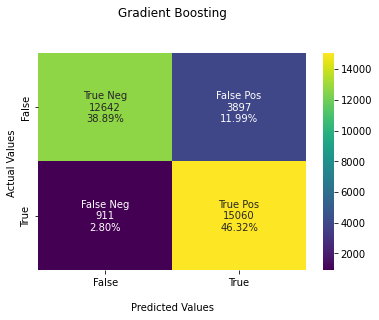

In [72]:
LPgbm = GradientBoostingClassifier()

#Fit 'LPsvm' to the training set
LPgbm.fit(X_train, y_train)

# Predict Output
gy_predict = LPgbm.predict(X_valid)
pred_LPgbm = LPgbm.predict_proba(X_valid)[:,1]


#Train and Test Scores
LPgbm_Tr_Score = round(LPgbm.score(X_train, y_train)*100, 2)
LPgbm_Tt_Score = round(LPgbm.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPgbm_Tt_Score))


print()
LPgbm_sc = round(accuracy_score(y_valid, gy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPgbm_sc))
print()
PS_gbm = round(precision_score(y_valid, gy_predict)*100, 2)
print("Precision Score: {}%".format(PS_gbm))
print()
RS_gbm = round(recall_score(y_valid, gy_predict)*100, 2)
print("Recall Score: {}%".format(RS_gbm))
print()
FS_gbm = round(f1_score(y_valid, gy_predict), 2)
print("F1 Score: {}%".format(FS_gbm))
print()
fpr5, tpr5, threshold = roc_curve(y_valid, pred_LPgbm)
roc_auc = metrics.auc(fpr5, tpr5)
LPgbmA = round(metrics.auc(fpr5, tpr5)*100, 2)
print(f'AUC score is:', LPgbmA,'%')
print()
confusion = confusion_matrix(y_valid, gy_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Gradient Boosting")

## **Finding The Best Model**

In [73]:
score = [LPdt_sc, LPrf_sc, LPlr_sc, LPknn_sc, LPgbm_sc]
LPModels_Acc = pd.DataFrame({'Models': ["HistGradientBoosting",
                                        "AdaBoost",
                                        "Logistic Regression",
                                        "K-Nearest Neighbors",
                                        "Gradient Boosting"], 'Accuracy Score': score})
LPModels_Acc.sort_values(by='Accuracy Score', ascending=False)

,Models,Accuracy Score
0,HistGradientBoosting,87.39
4,Gradient Boosting,85.21
1,AdaBoost,80.00
3,K-Nearest Neighbors,67.78
2,Logistic Regression,54.31


In [74]:
score = [PS_dt, PS_rf, PS_lr, PS_knn, PS_gbm]
LPModels_Pre = pd.DataFrame({'Models': ["HistGradientBoosting",
                                        "AdaBoost",
                                        "Logistic Regression",
                                        "K-Nearest Neighbors",
                                        "Gradient Boosting"], 'Precision Score': score})
LPModels_Pre.sort_values(by='Precision Score', ascending=False)

,Models,Precision Score
0,HistGradientBoosting,79.94
4,Gradient Boosting,79.44
1,AdaBoost,78.34
3,K-Nearest Neighbors,72.27
2,Logistic Regression,53.94


In [75]:
score = [RS_dt, RS_rf, RS_lr, RS_knn, RS_gbm]
LPModels_Rec = pd.DataFrame({'Models': ["HistGradientBoosting",
                                        "AdaBoost",
                                        "Logistic Regression",
                                        "K-Nearest Neighbors",
                                        "Gradient Boosting"], 'Recall Score': score})
LPModels_Rec.sort_values(by='Recall Score', ascending=False)

,Models,Recall Score
0,HistGradientBoosting,99.24
4,Gradient Boosting,94.30
1,AdaBoost,81.95
3,K-Nearest Neighbors,55.83
2,Logistic Regression,47.91


In [76]:
score = [FS_dt, FS_rf, FS_lr, FS_knn, FS_gbm]
LPModels_F1 = pd.DataFrame({'Models': ["HistGradientBoosting",
                                        "AdaBoost",
                                        "Logistic Regression",
                                        "K- Nearest Neighbors",
                                        "Gradient Boosting"], 'F1 Score': score})
LPModels_F1.sort_values(by='F1 Score', ascending=False)

,Models,F1 Score
0,HistGradientBoosting,0.89
4,Gradient Boosting,0.86
1,AdaBoost,0.80
3,K- Nearest Neighbors,0.63
2,Logistic Regression,0.51


In [77]:
LPMetric = pd.DataFrame({'Models': ["HistGradientBoosting",
                                        "AdaBoost",
                                        "Logistic Regression",
                                        "K- Nearest Neighbors",
                                        "Gradient Boosting"],
                             'Accuracy Score': [LPdt_sc, LPrf_sc, LPlr_sc, LPknn_sc, LPgbm_sc],
                             'Precision Score': [PS_dt, PS_rf, PS_lr, PS_knn, PS_gbm],
                             'Recall Score': [RS_dt, RS_rf, RS_lr, RS_knn, RS_gbm],
                             'F1 Score': [FS_dt, FS_rf, FS_lr, FS_knn, FS_gbm]})


LPMetrics = LPMetric.sort_values(by = 'Accuracy Score',ascending = False)
LPMetrics = LPMetrics.set_index('Models')
LPMetrics

,Accuracy Score,Precision Score,Recall Score,F1 Score
Models,,,,
HistGradientBoosting,87.39,79.94,99.24,0.89
Gradient Boosting,85.21,79.44,94.30,0.86
AdaBoost,80.00,78.34,81.95,0.80
K- Nearest Neighbors,67.78,72.27,55.83,0.63
Logistic Regression,54.31,53.94,47.91,0.51


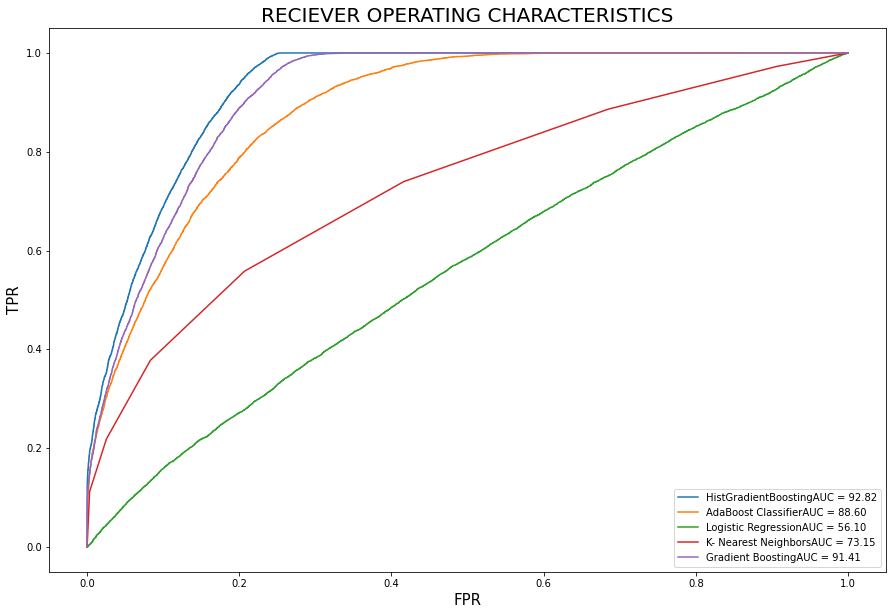

In [78]:
plt.figure(figsize = (15,10))
plt.plot(fpr1,tpr1, label ='HistGradientBoosting' 'AUC = %0.2f' % LPhgbA)
plt.plot(fpr2,tpr2, label = 'AdaBoost Classifier' 'AUC = %0.2f' % LPabtA)
plt.plot(fpr3,tpr3, label = 'Logistic Regression' 'AUC = %0.2f' %  LPlrA)
plt.plot(fpr4,tpr4, label = 'K- Nearest Neighbors' 'AUC = %0.2f' % LPknnA)
plt.plot(fpr5,tpr5, label = 'Gradient Boosting' 'AUC = %0.2f' % LPgbmA)
plt.legend(loc = 'best')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('RECIEVER OPERATING CHARACTERISTICS', fontsize = 20)
plt.show()

By all measured metric, **Histogram-based Gradient Boosting Classification Tree** performance best over all other model. We will continue to investigate it performance.

### **Feature Importance**

Histogram-based Gradient Boosting Classification Tree does not have attribute of feature importance.  Histogram-based Gradient Boosting Classification Tree is based on Gradient Boosting Classifier which has the feature importance attribute.  Gradient Boosting Classification Tree makes it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below

In [79]:
importance = pd.DataFrame({'feature':X.columns,'importance':np.round(LPgbm.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')

In [80]:
importance.head(15)

,importance
feature,
Number of Open Accounts,0.232
Years in current job,0.172
Long Term,0.154
Credit Score,0.129
Short Term,0.117
Current Loan Amount,0.076
Home Ownership,0.071
Years of Credit History,0.022
Annual Income,0.015


<AxesSubplot:ylabel='feature'>

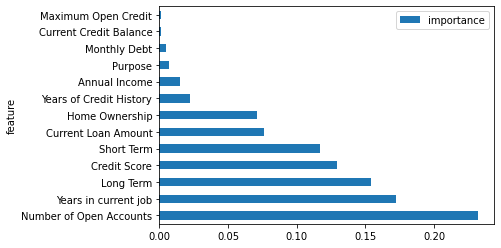

In [81]:
importance.plot.barh()

'Maximum Open Credit', 'Current Credit Balance', 'Purpose', 'Monthly Debt' are insignificant impact in the HistGradient Boosting Classifier ability in prediction process. Therefore they will be dropped to aid with improving the performance of the model.  

### **Dropping insignificant features** 

In [82]:
X.drop('Purpose', axis = 1, inplace = True)
X.drop('Monthly Debt', axis = 1, inplace = True)
X.drop('Current Credit Balance', axis = 1, inplace = True)
X.drop('Maximum Open Credit', axis = 1, inplace = True)

In [83]:
X.head(10)

,Home Ownership,Long Term,Short Term,Current Loan Amount,Credit Score,Years in current job,Annual Income,Years of Credit History,Number of Open Accounts
0,2,0,1,12232.0,716.612735,1.0,46643.0,18.000000,12.000000
1,3,1,0,25014.0,716.612735,10.0,81099.0,17.235916,14.000000
2,3,0,1,16117.0,716.612735,9.0,60438.0,16.700000,11.000000
3,2,0,1,11716.0,716.612735,3.0,34171.0,17.235916,10.763417
4,3,1,0,9789.0,716.612735,10.0,47003.0,16.700000,13.000000
5,3,0,1,11911.0,716.612735,2.0,70475.0,17.700000,13.000000
6,3,0,1,28988.0,716.612735,3.0,58074.0,22.800000,9.000000
7,1,1,0,17705.0,716.612735,3.0,49180.0,17.235916,10.000000
8,2,0,1,16812.0,716.612735,7.0,50945.0,14.600000,9.000000
9,2,1,0,9796.0,716.612735,1.0,58776.0,17.235916,12.000000


### **Training Random Forest Classifier again**

In [84]:
#from sklearn.ensemble import 
model = HistGradientBoostingClassifier()
learning_rate = [0.001, 0.01, 0.1]
max_depth = [3, 7, 9]

# define grid search
grid = dict(learning_rate=learning_rate, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

LPdt = HistGradientBoostingClassifier(**grid_result.best_params_, max_bins=255, max_iter=100)

#Fit 'LPdt' to the training set
LPdt.fit(X_trainval, y_trainval)

# Predict Output
dy_predict = LPdt.predict(X_test)
pred_LPdt = LPdt.predict_proba(X_test)[:,1]

#Train and Test Scores
LPdt_Tr_Score = round(LPdt.score(X_trainval, y_trainval)*100, 2)
LPdt_Tt_Score = round(LPdt.score(X_test, y_test)*100, 2)
print('train set score: {:.2f}'.format(LPdt_Tr_Score))
print('test set score: {:.2f}'.format(LPdt_Tt_Score))

Best: 0.870827 using {'learning_rate': 0.1, 'max_depth': 7}
train set score: 87.35
test set score: 87.36


The HistGradientBoostingClassifier dip a little in performance from 85.31% to 85%. Despite the marginal drop in performance, the classifier performed well. 

### **Evaluation with the confusion matrix and classification report**

Accuracy Score: 87.36%

Precision Score: 80.42%

Recall Score: 98.6%

F1 Score: 88.59%

ROC AUC Score: 92.45%




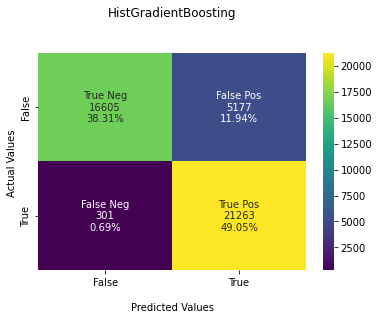

In [85]:
LPdt_sc = round(accuracy_score(y_test, dy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPdt_sc))
print()
PS_dt = round(precision_score(y_test, dy_predict)*100, 2)
print("Precision Score: {}%".format(PS_dt))
print()
RS_dt = round(recall_score(y_test, dy_predict)*100, 2)
print("Recall Score: {}%".format(RS_dt))
print()
FS_dt = round(f1_score(y_test, dy_predict)*100, 2)
print("F1 Score: {}%".format(FS_dt))
print()
RAS_dt = round(roc_auc_score(y_test, pred_LPdt)*100, 2)
print("ROC AUC Score: {}%".format(RAS_dt))
print()
confusion = confusion_matrix(y_test, dy_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "HistGradientBoosting")

**Confusion Matrix**
- The first row of the confusion matrix represents Loan Refused. **HistGradientBoostingClassifier** classified **16640** correctly as **[True Negative]**, which is correct prediction of loan refused and failed to classify **5142** correctly **[False Positive]** which is incorrect prediction of loan refused.
- The second row represents Loan Given. **HistGradientBoostingClassifier** classified **21293** correctly as **[True Positive]**, which is correct prediction of loan given and failed to classify **[271]** correctly **[False Negative]**, which is incorrect prediction of loan given.

### **ROC AUC SCORE and ROC AUC Curve**

In [86]:
pred_LPdt = LPdt.predict_proba(X_test)[:,1]

In [87]:
fpr, tpr, threshold = roc_curve(y_test, pred_LPdt )

In [88]:
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr, tpr)

In [89]:
r_a_score = round(roc_auc_score(y_test, pred_LPdt)*100, 2)
print("ROC-AUC-Score:", r_a_score,'%')

ROC-AUC-Score: 92.45 %


This curve plots **True Positive Rate** against **False Positive Rate**

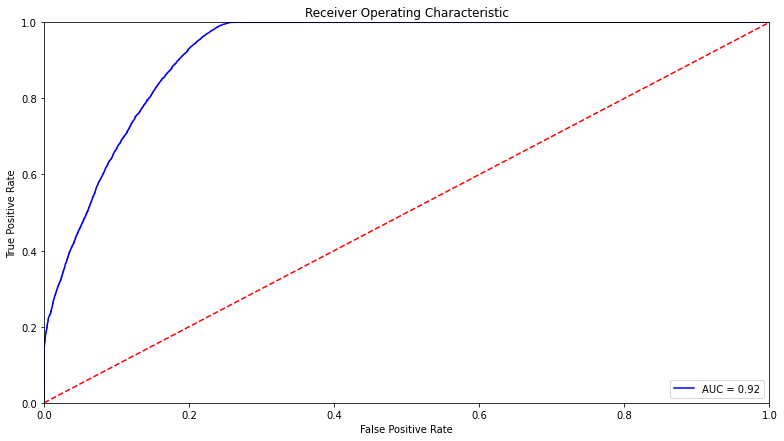

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

For a good model, the AUC score must be near 1 which means it has a good measure of separability. A poor model has an AUC score near 0 which means it has the worst measure of separability ie it is predicting 0s as 1s and 1s as 0s. And when AUC score is 0.5, it means the model has no class separation capacity whatsoever.


An AUC score of **93%** is a good score for the model. The higher the AUC, the better the model is at distinguishing between customers who were given loans and customers who were refused.

## **Saving Model**

In [91]:
from joblib import dump, load

In [92]:
dump(LPdt, 'ML_LoanPrediction_Model.joblib')

['ML_LoanPrediction_Model.joblib']

###  Redo 

In [ ]:
LPdt

#### 